In [2]:
#import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [83]:
data=pd.read_csv("personal_male.csv")
data.head(2)

,name,fullName,dob,country,birthPlace,nationalTeam,teams,battingStyle,bowlingStyle
0,Aakash Chopra,Aakash Shyamlal Chopra,19-09-1977,India,"Agra, Uttar Pradesh, India",India,"India, Kolkata Knight Riders",Right-hand bat,Right-arm medium
1,Aamer Hameed,Aamer Hameed,18-10-1954,Pakistan,"Lahore, Punjab, Pakistan",Pakistan,Pakistan,Right-hand bat,Right-arm medium-fast


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3856 entries, 0 to 3855
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          3856 non-null   object
 1   fullName      3856 non-null   object
 2   dob           3856 non-null   object
 3   country       3856 non-null   object
 4   birthPlace    3856 non-null   object
 5   nationalTeam  3788 non-null   object
 6   teams         3856 non-null   object
 7   battingStyle  3850 non-null   object
 8   bowlingStyle  3375 non-null   object
dtypes: object(9)
memory usage: 271.2+ KB


In [85]:
data.isnull().sum()

name              0
fullName          0
dob               0
country           0
birthPlace        0
nationalTeam     68
teams             0
battingStyle      6
bowlingStyle    481
dtype: int64

In [86]:
data[data.nationalTeam.isnull()].head(2)

,name,fullName,dob,country,birthPlace,nationalTeam,teams,battingStyle,bowlingStyle
37,Adam Dibble,Adam John Dibble,09-03-1991,England,"Exeter, Devon, England",NaN,Somerset,Right-hand bat,Right-arm medium-fast
211,Andrew Gale,Andrew William Gale,28-11-1983,England,"Dewsbury, Yorkshire, England",NaN,Yorkshire,Left-hand bat,Leg-break


Player from a paritcular country must play with that country's national team so we can replace national team missing value with correspoding country vlaue.

In [87]:
#impute the missing value with country value
data.nationalTeam.fillna(data.country, inplace=True)


In [88]:
data.nationalTeam.isnull().sum()

0

In [89]:
#check missing value in batting style column.
data[data.battingStyle.isnull()]

,name,fullName,dob,country,birthPlace,nationalTeam,teams,battingStyle,bowlingStyle
249,Anisur Rahman,Anisur Rahman,01-03-1971,Pakistan,"Dacca (now Dhaka, Bangladesh), Pakistan",Bangladesh,Bangladesh,NaN,NaN
994,Don Pringle,Donald James Pringle,01-05-1932,England,"Prestwich, Manchester, Lancashire, England",England,East Africa,NaN,NaN
1966,Karl Whatham,Karl Whatham,27-08-1981,Australia,Australia,Canada,Canada,NaN,NaN
2332,Mehmood Quaraishy,Mehmood Quaraishy,04-02-1942,Kenya,Kenya,Kenya,East Africa,NaN,NaN
3087,Ryan Ramdass,Ryan Rakesh Ramdass,03-07-1983,Guyana,"Ogle, East Coast, Demerara, Guyana",West Indies,West Indies,NaN,NaN
3640,Vinoo Tewarie,Vinoo Arsh Baldewpersad Tewarie,14-09-1991,Netherlands,"Purmerend, Netherlands",Netherlands,Netherlands,NaN,NaN


In [90]:
#check most common batting style if bowling style is missing
data[data.bowlingStyle.isnull()].battingStyle.value_counts()

Right-hand bat    428
Left-hand bat      47
Name: battingStyle, dtype: int64

In [91]:
#get the mode of batting style
c = data.battingStyle.mode()[0]

In [92]:
#we can replace missing battingStyle with right-hand bat

data.battingStyle.fillna(c, inplace=True)

In [93]:
#check again batting style column for missing values

data.battingStyle.value_counts()

Right-hand bat    3128
Left-hand bat      728
Name: battingStyle, dtype: int64

In [94]:
#check missing value in bowling style column

data[data.bowlingStyle.isnull()].head(2)

,name,fullName,dob,country,birthPlace,nationalTeam,teams,battingStyle,bowlingStyle
18,Abdul Kadir,Abdul Kadir,10-05-1944,India,"Karachi, Sind (now in Pakistan), India",Pakistan,Pakistan,Right-hand bat,NaN
22,Abdul Rehman,Abdul Rehman,02-01-1987,United Arab Emirates,"Ajman, United Arab Emirates",United Arab Emirates,United Arab Emirates,Right-hand bat,NaN


In [95]:
#most common bowling style and corrsponding batting style

data[data.battingStyle=='Right-hand bat']['bowlingStyle'].value_counts()

Right-arm medium                          560
Right-arm fast-medium                     513
Off-break                                 458
Leg-break                                 189
Right-arm medium-fast                     181
                                         ... 
Right-arm medium, Right-arm slow            1
Right-arm fast, Leg-break googly            1
Slow left-arm, Left-arm medium              1
Right-arm off break                         1
Right-arm medium, Off-break, Leg-break      1
Name: bowlingStyle, Length: 73, dtype: int64

In [96]:
data[data.battingStyle=='Left-hand bat']['bowlingStyle'].value_counts()

Slow left-arm                                    155
Right-arm medium                                 106
Off-break                                        101
Left-arm fast-medium                              43
Left-arm medium                                   42
Right-arm fast-medium                             38
Leg-break                                         34
Right-arm medium-fast                             25
Leg-break googly                                  24
Chinaman                                          17
Left-arm medium, Slow left-arm                    17
Right-arm fast                                    17
Left-arm medium-fast                              15
Right-arm medium, Off-break                        8
Left-arm fast                                      7
Right-arm slow-medium                              4
Slow left-arm, Left-arm medium                     4
Left-arm slow-medium                               4
Right-arm                                     

In [105]:
data.loc[(data.bowlingStyle.isnull()) & (data.battingStyle=='Right-hand bat'),'bowlingStyle']='Right-arm medium'

In [106]:
data[data.bowlingStyle.isnull()]

,name,fullName,dob,country,birthPlace,nationalTeam,teams,battingStyle,bowlingStyle
110,Alan Turner,Alan Turner,23-07-1950,Australia,"Camperdown, Sydney, New South Wales, Australia",Australia,Australia,Left-hand bat,NaN
175,Allan Rae,Allan Fitzroy Rae,30-09-1922,Jamaica,"Rollington Town, Kingston, Jamaica",West Indies,West Indies,Left-hand bat,NaN
363,Avishka Gunawardene,Dihan Avishka Gunawardene,26-05-1977,Sri Lanka,"Colombo, Sri Lanka",Sri Lanka,Sri Lanka,Left-hand bat,NaN
367,Azeem Pitcher,Azeem Ryan Pitcher,31-07-1980,Trinidad and Tobago,Trinidad,Bermuda,Bermuda,Left-hand bat,NaN
384,Barlow Carkeek,William Carkeek,17-10-1878,Australia,"Walhalla, Victoria, Australia",Australia,Australia,Left-hand bat,NaN
406,Ben Barnett,Benjamin Arthur Barnett,23-03-1908,Australia,"Auburn, Melbourne, Victoria, Australia",Australia,Australia,Left-hand bat,NaN
890,Dean Minors,Dean Anthony Minors,06-01-1970,Bermuda,"Hamilton, Bermuda",Bermuda,Bermuda,Left-hand bat,NaN
950,Dick Spooner,Richard Thompson Spooner,30-12-1919,England,"Thornaby-on-Tees, Stockton-on-Tees, Co Durham,...",England,England,Left-hand bat,NaN
1089,Eric Tindill,Eric William Thomas Tindill,18-12-1910,New Zealand,"Nelson, New Zealand",New Zealand,New Zealand,Left-hand bat,NaN
1123,Faizan Asif,Faizan Asif,26-12-1982,Pakistan,Pakistan,United Arab Emirates,United Arab Emirates,Left-hand bat,NaN


In [107]:
data.bowlingStyle.isnull().sum()

47

In [108]:
data.loc[(data.bowlingStyle.isnull()) & (data.battingStyle=='Left-hand bat'),'bowlingStyle']='Slow left-arm'

In [109]:
data.bowlingStyle.isnull().sum()

0

# Data is ready for visualization

In [112]:
# no of players in per national team

data.head(2)

,name,fullName,dob,country,birthPlace,nationalTeam,teams,battingStyle,bowlingStyle
0,Aakash Chopra,Aakash Shyamlal Chopra,19-09-1977,India,"Agra, Uttar Pradesh, India",India,"India, Kolkata Knight Riders",Right-hand bat,Right-arm medium
1,Aamer Hameed,Aamer Hameed,18-10-1954,Pakistan,"Lahore, Punjab, Pakistan",Pakistan,Pakistan,Right-hand bat,Right-arm medium-fast


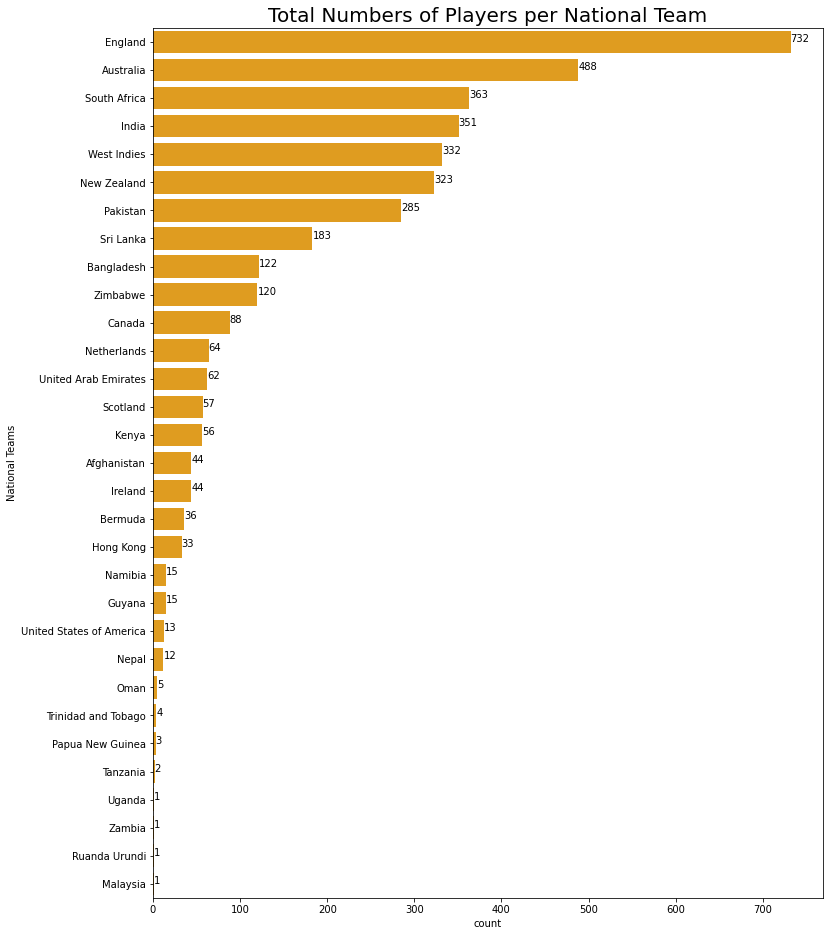

In [131]:
plt.figure(figsize=(12,16))
ax = sns.countplot(y='nationalTeam', data = data, color = 'orange', order = data['nationalTeam'].value_counts().index)

for p in ax.patches:
    percentage ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))
plt.ylabel('National Teams')
plt.title('Total Numbers of Players per National Team', fontsize = 20);
plt.show()

In [133]:
data.nationalTeam.unique()

array(['India', 'Pakistan', 'Australia', 'South Africa', 'New Zealand',
       'Kenya', 'Canada', 'United Arab Emirates', 'Afghanistan',
       'Bangladesh', 'England', 'Zimbabwe', 'West Indies', 'Netherlands',
       'Hong Kong', 'United States of America', 'Sri Lanka', 'Scotland',
       'Ireland', 'Bermuda', 'Malaysia', 'Guyana', 'Nepal', 'Namibia',
       'Ruanda Urundi', 'Trinidad and Tobago', 'Tanzania', 'Uganda',
       'Zambia', 'Papua New Guinea', 'Oman'], dtype=object)

In [233]:
bowl_list= data.groupby('bowlingStyle')['name'].count().reset_index().sort_values(by='name',ascending=False)
final_bowl_list = bowl_list['bowlingStyle'].head(10).to_list()
final_bowl_list

['Right-arm medium',
 'Off-break',
 'Right-arm fast-medium',
 'Slow left-arm',
 'Leg-break',
 'Right-arm medium-fast',
 'Right-arm fast',
 'Leg-break googly',
 'Left-arm fast-medium',
 'Left-arm medium']

In [238]:
#team with different bowling style

data = data[data['bowlingStyle'].isin(final_bowl_list)]

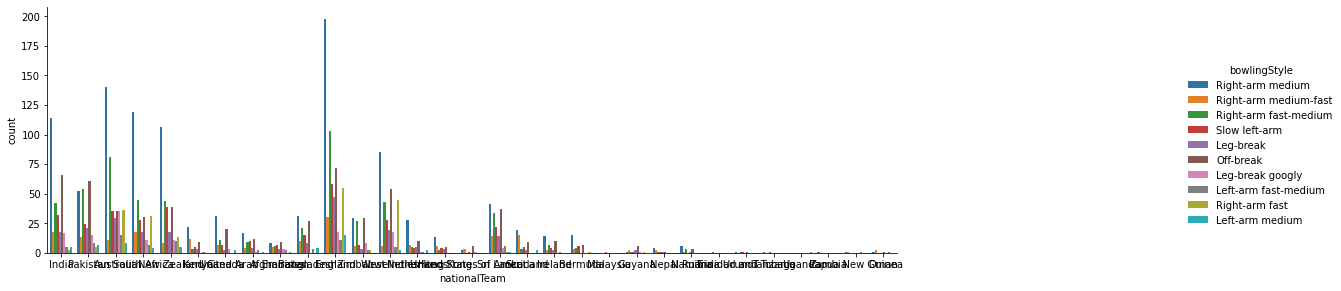

In [259]:
sns.catplot(x="nationalTeam", kind="count", data=data, hue='bowlingStyle');
fig=plt.gcf()
fig.set_size_inches(20,4)
plt.show()

In [261]:
bowl = data.groupby(['nationalTeam', 'bowlingStyle']).count()['name'].reset_index().rename(columns={'nationalTeam':'nationalTeam','bowlingStyle' : 'bowlingStyle', 'name':'count'}).sort_values(by=['count'], ascending=False)
# keep top 5 bowling styles
bowl = bowl.groupby('nationalTeam').head(5).reset_index(drop=True)

In [263]:
# create top teams list 
top_countries = ['England', 'Australia', 'South Africa', 'India', 'West Indies', 'New Zealand', 'Pakistan', 'Sri Lanka', 'Bangladesh', 'Zimbabwe']

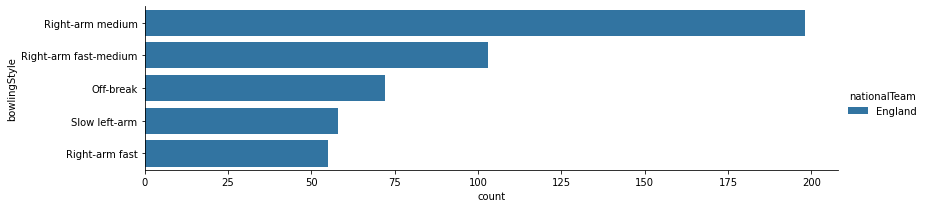

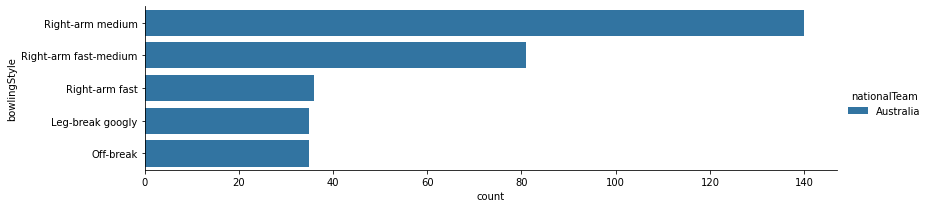

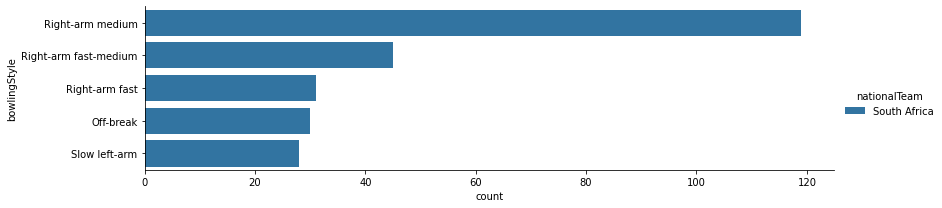

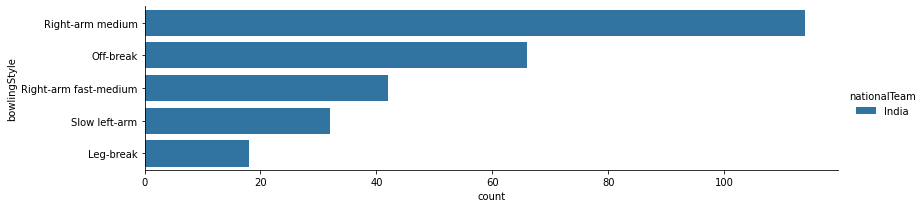

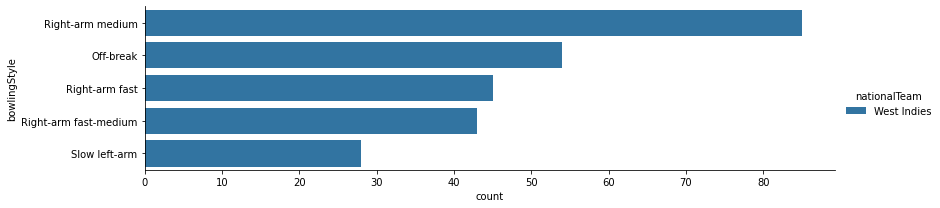

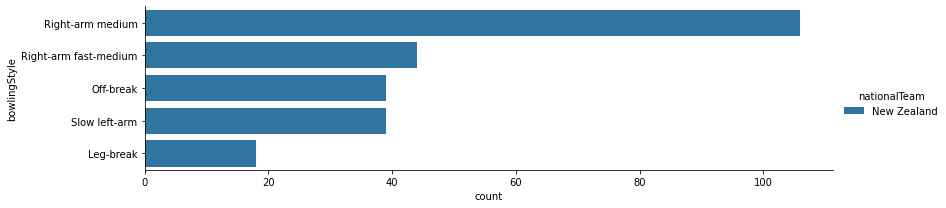

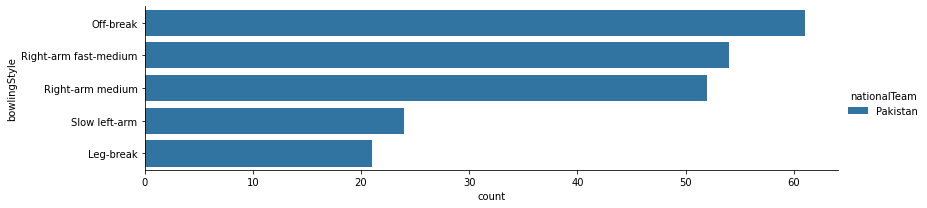

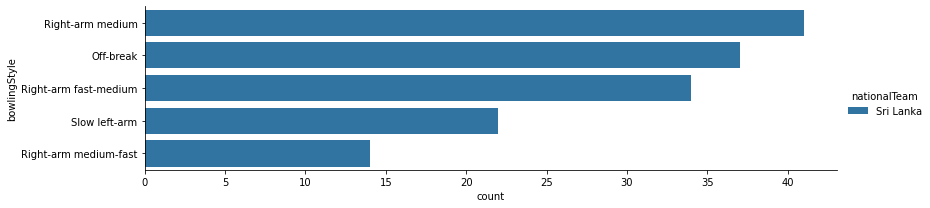

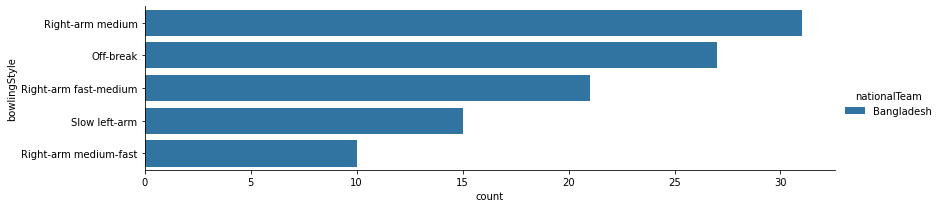

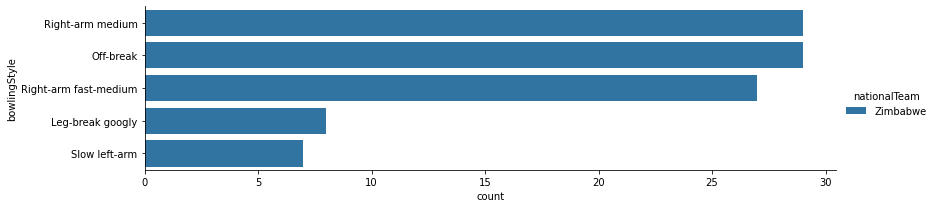

In [264]:
for i in top_countries:
    sns.catplot(x = 'count', y = 'bowlingStyle', data = bowl[bowl.nationalTeam.isin([i])], height=3, aspect=4, kind = 'bar', hue = 'nationalTeam');

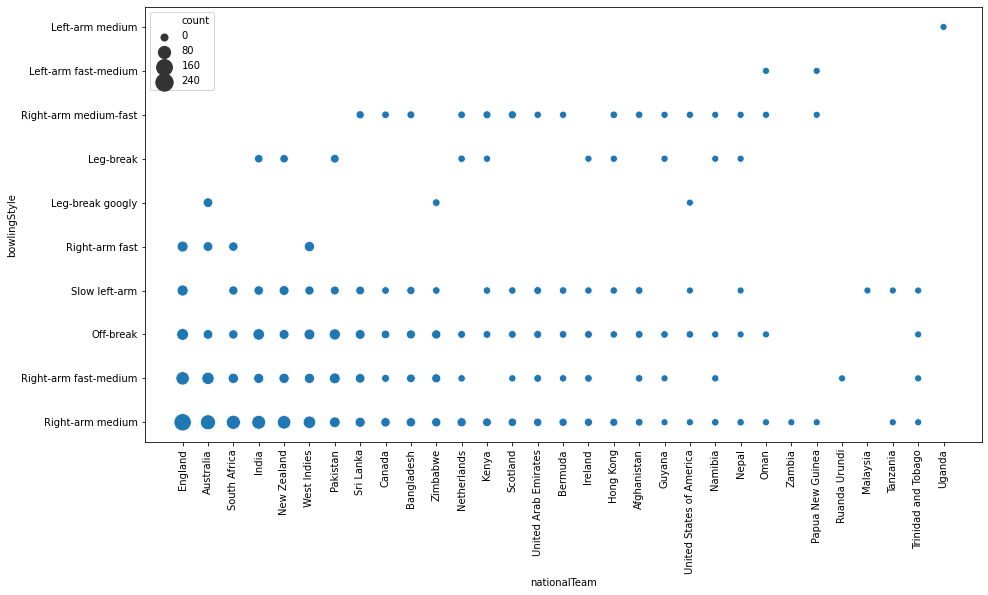

In [265]:
fig = plt.figure(figsize=(15,8))
g = sns.scatterplot('nationalTeam', 'bowlingStyle', data=bowl, size = 'count',sizes=(50, 300) )
plt.xticks(rotation=90);

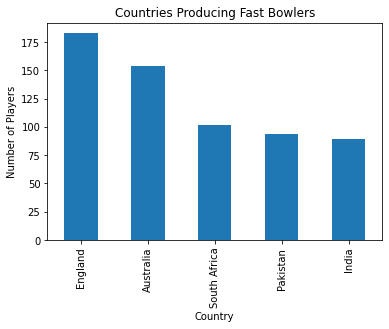

In [267]:
data[data.bowlingStyle.str.contains('fast')].country.value_counts()[:5].plot(kind = 'bar')
plt.ylabel('Number of Players')
plt.xlabel('Country')
plt.title('Countries Producing Fast Bowlers');